In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import hilbert

%matplotlib inline

# 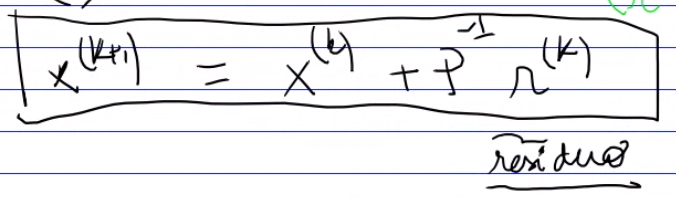

In [10]:
def jacobi(A, b, x = None, tol = 1e-3, maxIt = 50):
    #normalizando as entradas
    b = b.flatten().reshape((b.shape[0], 1))
    
    P = np.diag(np.diag(A)) #para transformar em matriz usamos diag de novo
    invP = np.linalg.inv(P)
    
    if x is None:
        x = np.zeros(b.shape)
    
    #iteração
    for it in range(maxIt):
        #calculando o resíduo e o erro
        r = b - A.dot(x)
        er = max(np.abs(r)) #ou er = np.linalg.norm(r)
        
        if er <= tol:
            return x, it
        
        x = x + invP.dot(r)
        
    print("Máximo de itrações foi atingido")
    return x, maxIt

In [3]:
d = 20 * np.ones((5,))
D = np.diag(d)
#A = np.random.randint(0, 5, (5, 5)) + D
A = np.array([[0, 2, 4, 1, 4], [2, 3, 2, 3, 3], [1, 1, 4, 4, 0], [3, 3, 1, 4, 4], [2, 1, 1, 0, 4]]) + D
x_sol = np.ones((5, 1))
b = A.dot(x_sol)
print(A)
print(np.linalg.det(A))

[[20.  2.  4.  1.  4.]
 [ 2. 23.  2.  3.  3.]
 [ 1.  1. 24.  4.  0.]
 [ 3.  3.  1. 24.  4.]
 [ 2.  1.  1.  0. 24.]]
5984266.999999991


In [4]:
x, it = jacobi(A, b)
print(it, x)

11 [[1.00001508]
 [1.0000137 ]
 [1.00001006]
 [1.00001426]
 [1.00000632]]


In [5]:
def criaMat(n): #Criando a matriz A
    a = np.ones((n,)) #Criando um vetor de 1 de dimensão n
    M = np.diag(-2 * a) + np.diag(a[1:], -1) + np.diag(a[1:], 1)
    return M

def PVF_simp(l, alpha, beta, f, n, maxIt = 50):
    #Discretizando o intervalo
    x = np.linspace(0, l, n+2)
    xi = x[1:-1]
    h = (l)/(n+1)
    h2 = h**2
    
    #Calculando f(xi)
    A = criaMat(n)
    F = h2 * f(xi)
    F[0] -= alpha
    F[-1] -= beta
    y = np.zeros((n+2,))
    y[0] = alpha
    y[-1] = beta
    
    #Montando e resolvendo o sistema linear
    sol, it = jacobi(A, F, maxIt = maxIt)
    print(it)
    y[1:-1] = sol.flatten()
    return y, x

107


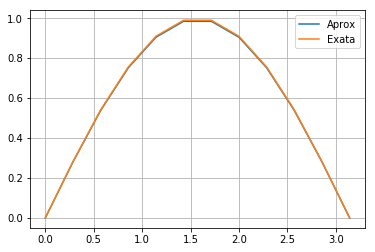

In [6]:
f = lambda x: -np.sin(x)
alpha = 0
beta = 0
l = np.pi
ex = lambda x: np.sin(x)
n = 10

y, x = PVF_simp(l, alpha, beta, f, n, maxIt = 1000)

plt.plot(x, y, label = 'Aprox')
plt.plot(x, ex(x), label = 'Exata')
plt.legend()
plt.grid()